In [3]:
import pathlib

import matplotlib as mpl
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scirpy as ir

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter, MultipleLocator

savefig_args = {
    "dpi": 300,
    "bbox_inches": "tight",
    "pad_inches": 0,
    "transparent": True,
}
output_dir = "../../figures/figureS4"
pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)
output_suffix = ""
output_formats = [".png", ".svg", ".eps"]
filetype = "svg"
sc.settings.figdir = output_dir
sc.set_figure_params(format="svg", transparent=True)
sc.set_figure_params(dpi_save=150, figsize=(3.5, 3.5))


def save_figure(
    fig,
    name,
    output_dir=output_dir,
    output_suffix=output_suffix,
    output_formats=output_formats,
    savefig_args=savefig_args,
):
    for output_format in output_formats:
        fig.savefig(
            output_dir + "/" + name + output_suffix + output_format, **savefig_args
        )
    return None


width = plt.rcParams["figure.figsize"][0]
height = plt.rcParams["figure.figsize"][1]

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 100)

plt.style.use("../../scripts/paper.mplstyle")
%run ../../scripts/plotting_helper.py

In [4]:
stat_file = '../../../code/outputs/seqclone_with_effect_size_bcells/clone_id_var_df.csv'

real_stats_df = pd.read_csv(stat_file, index_col=0)


pc_genes = pd.read_csv('../../../code/outputs/seqclone_BM2_std_allcells/clone_id_tests.csv', index_col=0)


pc_genes['freq_pvalue'] = pc_genes.freq_pvalue / 10**4
pc_genes = correct_p(pc_genes, 'freq_pvalue', 'bonferroni')
pc_genes = correct_p(pc_genes, 'pvalue', 'fdr_bh')

clonal_in_vivo = pc_genes[pc_genes.significant == True]

print(clonal_in_vivo[~clonal_in_vivo.index.str.contains('IGH|IGK|IGL')].shape[0], "of the clonal in vivo genes were Ig Variable")
print(clonal_in_vivo[clonal_in_vivo.index.str.contains('IGH|IGK|IGL')].shape[0], "of the clonal in vivo genes were Ig Variable")

270 of the clonal in vivo genes were Ig Variable
125 of the clonal in vivo genes were Ig Variable


Text(0.5, 0, 'Clonally Coherent Gene')

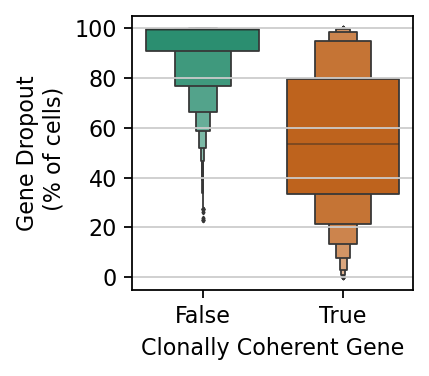

In [5]:
g = sns.boxenplot(data = real_stats_df, x = 'clonally_expressed', y = 'pct_dropout_by_counts', palette="Dark2")
plt.ylabel("Gene Dropout\n (% of cells)")
plt.xlabel("Clonally Coherent Gene")

In [6]:
save_figure(g.figure, "dropout_by_clonally_expressed")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [8]:
pc_genes['In'] = 'in vivo'
real_stats_df['In'] = 'in vitro'

data = pd.concat([real_stats_df.reset_index(), pc_genes.reset_index()])

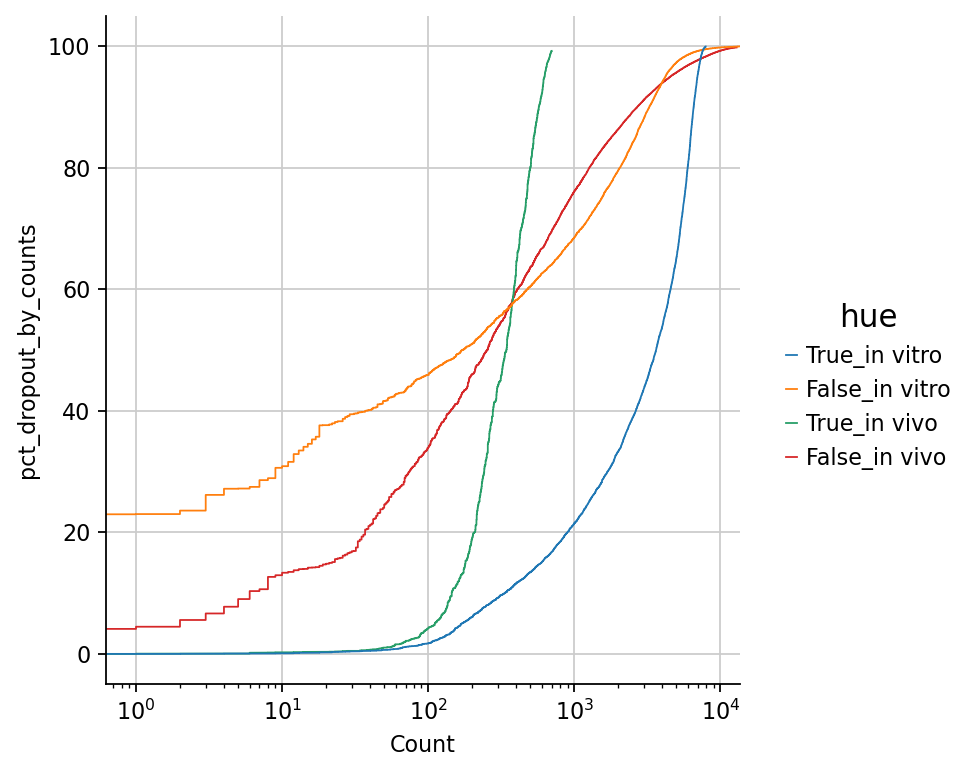

In [9]:
data.index = data['index'].astype(str) + data['In']
data['hue'] = data['clonally_expressed'].astype(str) + '_' + data['In']
sns.displot(data = data, hue = 'hue', y = 'pct_dropout_by_counts', kind = 'ecdf', stat = 'count')
plt.xscale('log')

(8, 7934.0)

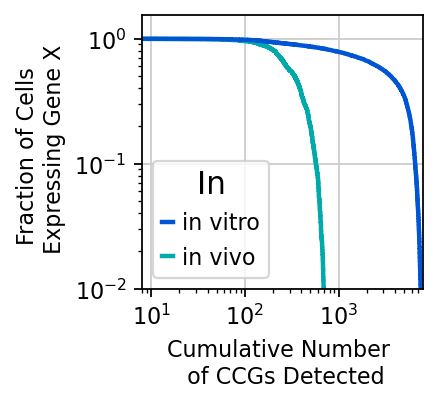

In [17]:
data.index = data['index'].astype(str) + data['In']
data['hue'] = data['clonally_expressed'].astype(str) + '_' + data['In']
data['fraction of cells expressing'] = (100 - data.pct_dropout_by_counts) / 100
y = 'fraction of cells expressing'
fig, ax = plt.subplots(1,1)

#sns.ecdfplot(data = data[data.clonally_expressed == False], hue = 'In', y = y, palette='winter', stat = 'count', ls = '-.', complementary=True)
sns.ecdfplot(data = data[data.clonally_expressed == True], hue = 'In', y = y, stat = 'count', palette='winter', complementary=True, lw=2)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Cumulative Number \n of CCGs Detected')
plt.ylabel('Fraction of Cells \n Expressing Gene X')
plt.ylim(0.01)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


In [11]:
save_figure(fig, 'invivo_vs_invitro_clonal_genes_legend')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(0.01, 32.00275155541388)

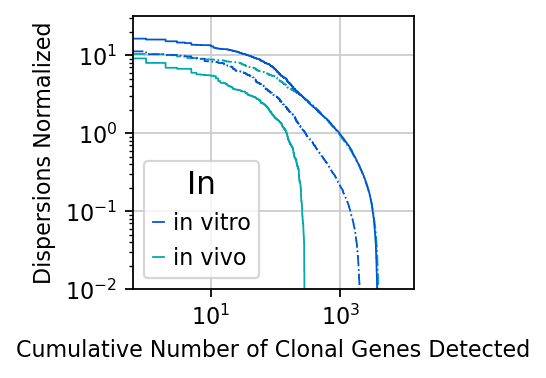

In [10]:
data.index = data['index'].astype(str) + data['In']
data['hue'] = data['clonally_expressed'].astype(str) + '_' + data['In']
data['fraction of cells expressing'] = (100 - data.pct_dropout_by_counts) / 100
y = 'dispersions_norm'

fig, ax = plt.subplots(1,1)

sns.ecdfplot(data = data[data.clonally_expressed == False], hue = 'In', y = y, palette='winter', stat = 'count', ls = '-.', complementary=True)
sns.ecdfplot(data = data[data.clonally_expressed == True], hue = 'In', y = y, stat = 'count', palette='winter', complementary=True)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Cumulative Number of Clonal Genes Detected')
plt.ylabel('Dispersions Normalized')
plt.ylim(0.01)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


In [11]:
data = real_stats_df[(real_stats_df.pct_dropout_by_counts > 90) & (real_stats_df.freq_pvalue == 0)]
# maybe these are the most interesting features to select
data = data.reset_index()
data['index'].str.contains('IGH|IGL|IGK').value_counts(normalize = True)

False    0.791489
True     0.208511
Name: index, dtype: float64

In [12]:
stats = pc_genes
data = stats[(stats.pct_dropout_by_counts > 90) & (stats.freq_pvalue == 0)]
data = stats[stats.clonally_expressed == True]
# maybe these are the most interesting features to select
data = data.reset_index()
data['index'].str.contains('IGH|IGL|IGK').value_counts(normalize = True)

False    0.801429
True     0.198571
Name: index, dtype: float64

In [13]:
stats = real_stats_df
data = stats[(stats.pct_dropout_by_counts > 90) & (stats.freq_pvalue == 0)]
data = stats[stats.clonally_expressed == True]
# maybe these are the most interesting features to select
data = data.reset_index()
data['index'].str.contains('IGH|IGL|IGK').value_counts(normalize = True)

False    0.973027
True     0.026973
Name: index, dtype: float64